# Import Data

## Pandas ta

In [1]:
import pandas as pd
import numpy as np 
import pandas_ta as ta


In [2]:
df = pd.read_csv('Data\meta_1.csv')
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [3]:
# (1) Create the Strategy
MyStrategy = ta.Strategy(
    name="DCSMA10",
    ta=[
        {"kind": "ohlc4"},
        {"kind": "sma", "length": 10},
        {"kind": "donchian", "lower_length": 10, "upper_length": 15},
        {"kind": "ema", "close": "OHLC4", "length": 10, "suffix": "OHLC4"},
    ]
)

# (2) Run the Strategy
df.ta.strategy(MyStrategy)

In [4]:
df[11:20]

,datetime,symbol,open,high,low,close,volume,OHLC4,SMA_10,DCL_10_15,DCM_10_15,DCU_10_15,EMA_10_OHLC4
11,2021-01-06 01:30:00,NASDAQ:META,270.34,271.76,270.34,271.74,27723.0,271.0450,269.714,265.25,NaN,NaN,270.002999
12,2021-01-06 02:30:00,NASDAQ:META,271.72,272.04,270.78,270.82,34187.0,271.3400,270.101,265.94,NaN,NaN,270.246090
13,2021-01-06 03:30:00,NASDAQ:META,270.76,271.44,270.57,270.93,44533.0,270.9250,270.350,268.01,NaN,NaN,270.369528
14,2021-01-06 21:30:00,NASDAQ:META,261.61,266.73,260.01,266.54,266892.0,263.7225,270.076,260.01,267.335,274.66,269.160978
15,2021-01-06 22:30:00,NASDAQ:META,266.42,267.70,266.16,267.17,161765.0,266.8625,269.966,260.01,266.290,272.57,268.743073
16,2021-01-06 23:30:00,NASDAQ:META,267.23,267.23,265.10,265.78,62917.0,266.3350,269.646,260.01,266.195,272.38,268.305241
17,2021-01-07 00:30:00,NASDAQ:META,265.91,266.40,264.68,265.19,102329.0,265.5450,269.036,260.01,266.195,272.38,267.803379
18,2021-01-07 01:30:00,NASDAQ:META,265.22,266.60,264.76,265.00,44588.0,265.3950,268.371,260.01,266.195,272.38,267.365492
19,2021-01-07 02:30:00,NASDAQ:META,265.04,265.92,263.48,264.88,54525.0,264.8300,267.837,260.01,266.195,272.38,266.904494


## Trading View TA

In [5]:
# find exchange and symbols : https://tvdb.brianthe.dev/
from tradingview_ta import TA_Handler, Interval, Exchange

handler = TA_Handler(
    symbol="META",
    exchange="NASDAQ",
    screener="america",
    interval="1h",
    timeout=None
)
analysis = handler.get_analysis()

In [6]:
analysis.summary

{'RECOMMENDATION': 'BUY', 'BUY': 13, 'SELL': 4, 'NEUTRAL': 9}

# Data Preprocessing

In [7]:
# extract data 
main_df = df[df['datetime'] > '2023']
main_df.head()

,datetime,symbol,open,high,low,close,volume,OHLC4,SMA_10,DCL_10_15,DCM_10_15,DCU_10_15,EMA_10_OHLC4
3515,2023-01-03 21:30:00,NASDAQ:META,122.80,126.35,122.30,123.045,368686.0,123.62375,119.7770,117.75,122.050,126.35,119.960429
3516,2023-01-03 22:30:00,NASDAQ:META,123.11,124.65,122.60,124.650,206537.0,123.75250,120.1795,117.75,122.050,126.35,120.649896
3517,2023-01-03 23:30:00,NASDAQ:META,124.64,124.64,123.57,123.920,139143.0,124.19250,120.5515,117.75,122.050,126.35,121.294006
3518,2023-01-04 00:30:00,NASDAQ:META,123.95,124.58,123.67,124.530,88557.0,124.18250,121.1535,118.30,122.325,126.35,121.819187
3519,2023-01-04 01:30:00,NASDAQ:META,124.54,125.03,124.15,124.720,98212.0,124.61000,121.7495,118.50,122.425,126.35,122.326607


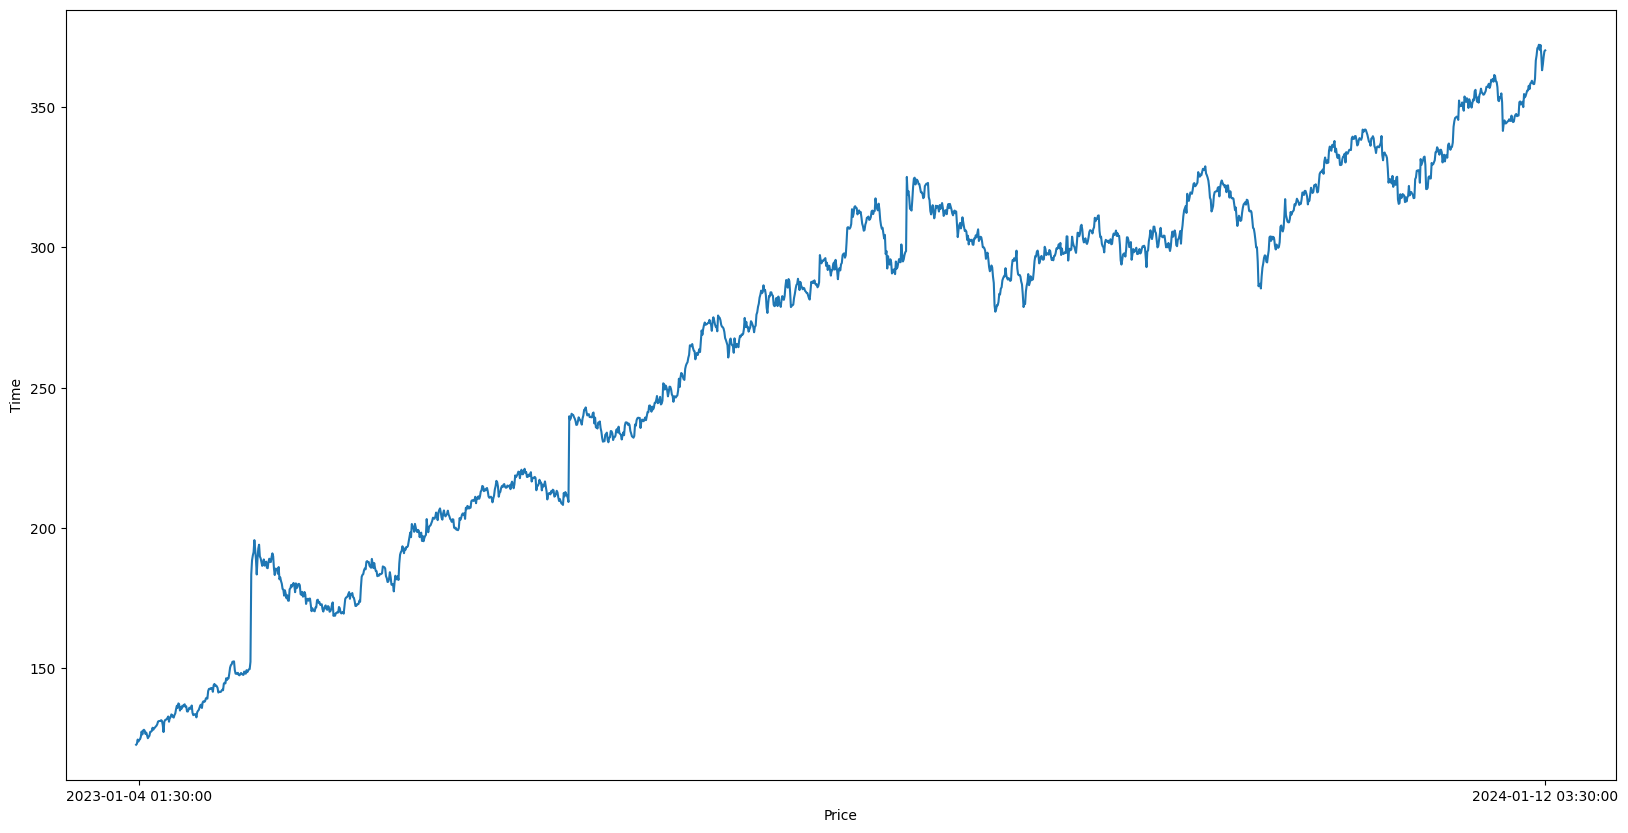

In [8]:
import matplotlib.pyplot as  plt 

plt.figure(figsize=(20, 10))
plt.plot(main_df['datetime'], main_df['open'])
plt.xlabel("Price")
plt.ylabel("Time")

plt.xticks(['2024-01-12 03:30:00', '2023-01-04 01:30:00'])
plt.show()

## Regional locals with  rolling window

In [9]:
'''
Find max and min regional locals using rolling window algorithm
'''
class RollingWindow : 
    def __init__(self, ys, w, pflag, xs) :
        self.ys = ys.tolist()
        self.w = w
        self.pflag = pflag
        self.xs = xs.tolist()

    
    # find the dictionary of regional locals 
    def find_dict_regional_locals(self, id) : 
        res = {}
        
        l = len(self.ys)
        for t in range(self.w + 1, l - self.w + 1) : 
            if id == True and self.ys[t] > max(self.ys[t - self.w : t]) and self.ys[t] > max(self.ys[t+1 : t + self.w + 1]) :
                res[self.xs[t]] = self.ys[t]

            if id == False and self.ys[t] < min(self.ys[t - self.w : t]) and self.ys[t] < min(self.ys[t+1 : t + self.w + 1]) : 
                res[self.xs[t]] = self.ys[t]

        return res

    # draw graph with regional locals 
    def show_graph(self, id) : 
        res = self.find_dict_regional_locals(id)

        plt.figure(figsize=(20, 10))
        plt.plot(self.xs, self.ys)
        plt.plot(res.keys(), res.values(), marker='o', linestyle='')
        plt.xlabel("Price")
        plt.ylabel("Time")

        plt.xticks(['2024-01-12 03:30:00', '2023-01-04 01:30:00'])
        plt.show()
    
    
    def find_regional_locals_max (self) : 
        if (self.pflag) : 
            self.show_graph(id =  True)
        else : 
            r = self.find_dict_regional_locals(id = True)
            print(r)


    def find_regional_locals_min (self) : 
        if (self.pflag) : 
            self.show_graph(id = False)
        else : 
            r = self.find_dict_regional_locals(id = False)
            print(r)

    

'\nFind max and min regional locals using rolling window algorithm\n'

In [10]:
rw = RollingWindow(main_df['open'], 15, True, main_df['datetime'])
rw.find_regional_locals_max()

[[54, 137.52],
 [125, 152.51],
 [151, 195.7],
 [174, 190.99],
 [201, 180.43],
 [251, 173.51],
 [301, 189.01],
 [388, 207.0],
 [442, 215.0],
 [460, 216.82],
 [496, 221.13],
 [556, 240.73],
 [574, 243.0],
 [673, 251.58],
 [743, 275.75],
 [801, 286.5],
 [845, 288.82],
 [873, 297.27],
 [918, 314.68],
 [944, 317.48],
 [984, 325.12],
 [1029, 315.82],
 [1075, 306.44],
 [1124, 298.85],
 [1160, 300.23],
 [1207, 308.07],
 [1229, 311.41],
 [1251, 306.02],
 [1365, 328.89],
 [1386, 323.86],
 [1418, 317.0],
 [1530, 337.92],
 [1569, 342.04],
 [1590, 339.69],
 [1734, 361.45]]

In [11]:
rw.find_regional_locals_min()

[[35, 127.32],
 [77, 132.54],
 [195, 174.09],
 [252, 168.715],
 [329, 177.44],
 [367, 195.31],
 [411, 199.24],
 [455, 209.17],
 [545, 208.24],
 [603, 230.57],
 [756, 260.78],
 [836, 278.74],
 [860, 281.42],
 [896, 288.68],
 [929, 305.96],
 [969, 290.49],
 [1019, 310.38],
 [1097, 277.09],
 [1133, 278.76],
 [1171, 295.41],
 [1190, 295.32],
 [1236, 298.24],
 [1258, 293.89],
 [1290, 292.98],
 [1320, 298.725],
 [1373, 312.81],
 [1406, 307.66],
 [1436, 285.38],
 [1538, 329.34],
 [1612, 315.52],
 [1745, 341.52]]

## Find perceptually important point 

In [ ]:
from collections import OrderedDict
class PIP : 
    def __init__(self, ys, xs, n, method, pflag) :
        self.ys = ys.to_numpy()
        self.xs = np.array([i for i in range(len(xs))])
        self.n = n
        self.method = method
        self.pflag = pflag 
        self.xlabel = xs.tolist()
        self.init_matrix()
        
    # create new matrix Ax, Ay at the first time
    def init_matrix(self) : 
        k = len(self.xs)
        self.matrix_x = [[1 for _ in range(k)]]
        self.matrix_y = [[0 for _ in range(k)]]
        for i in range(1, k-1) : 
            if i - 0 <= k - 1 - i : 
                self.matrix_x[0][i] = 0
            else : 
                self.matrix_x[0][i] = k - 1
            self.matrix_y[0][i] = self.ys[self.matrix_x[0][i]]

        self.matrix_x.append(self.matrix_x[0][::-1])
        self.matrix_y.append(self.matrix_y[0][::-1])
        self.matrix_x[0][0] , self.matrix_x[1][0] = np.nan, np.nan
        self.matrix_y[0][0], self.matrix_y[1][0] = np.nan, np.nan
        self.matrix_x[0][k-1], self.matrix_x[1][k-1] = np.nan, np.nan
        self.matrix_y[0][k-1], self.matrix_y[1][k-1] = np.nan, np.nan
        self.matrix_x = np.array(self.matrix_x)
        self.matrix_y = np.array(self.matrix_y)


    # using to compute distance between 2 matrix 
    def caculate_distance (self) : 
        match (self.method) :
            case 0 : 
                return self.find_argmax(self.ED())
            case 1 :                 
                return self.find_argmax(self.PD())
            case 2 : 
                return self.find_argmax(self.VD())
            

    def find_argmax(self, r) : 
        while np.isnan(np.max(r)) : 
            r[np.argmax(r)] = -np.inf
        return np.argmax(r) 
    



    # change matrix after find pip 
    def present_matrix (self, pipx) : 
        self.matrix_x[0][pipx], self.matrix_x[1][pipx] = np.nan, np.nan
        self.matrix_y[0][pipx], self.matrix_y[1][pipx] = np.nan, np.nan

        for i in range(len(self.matrix_x[0])) : 
            if (np.isnan(self.matrix_x[0][i]) ) : continue
            
            if abs(self.matrix_x[0][i] - i) > abs(pipx - i) : 
                self.matrix_x[1][i] = self.matrix_x[0][i]
                self.matrix_x[0][i] = pipx
            elif abs(self.matrix_x[1][i] - i) > abs(pipx - i) : 
                self.matrix_x[1][i] = pipx
            
            self.matrix_y[0][i] = self.ys[int(self.matrix_x[0][i])]
            self.matrix_y[1][i] = self.ys[int(self.matrix_x[1][i])]

               
        

    def find_PIP(self) : 
        curr = 0
        res = {}
        res[self.xlabel[0]] = self.ys[0]
        while(curr < self.n - 2) : 
            pipx = self.caculate_distance()
            res[self.xlabel[pipx]]= self.ys[pipx]
            self.present_matrix(pipx)
            curr += 1
        res[self.xlabel[len(self.xs) - 1]] = self.ys[len(self.xs) - 1]
        res = OrderedDict(res)
        if (self.pflag) : 
            self.show_graph(res)
        else : 
            print(res)


    def show_graph(self, res) : 
        plt.figure(figsize=(20, 10))
        plt.plot(self.xlabel, self.ys)
        plt.plot(res.keys(), res.values(), marker = 'o', linestyle = '-') 
        plt.xlabel("Price")
        plt.ylabel("Time")

        plt.xticks(['2024-01-12 03:30:00', '2023-01-04 01:30:00'])
        plt.show()
        
    def ED(self) : 
        return (((self.matrix_x[0] - self.xs)** 2 + (self.matrix_y[0] - self.ys)**2) ** 0.5 
                + ((self.matrix_x[1] - self.xs) **2 + (self.matrix_y[1] - self.ys)**2 )**0.5)

    def PD(self) :
        S = (self.matrix_y[0] - self.matrix_y[1]) / (self.matrix_x[0] - self.matrix_x[1])
        C = self.matrix_y[0] - S * self.matrix_x[0]

        return abs(S * self.xs - self.ys + C) / (S **2 + 1)**0.5

    def VD(self) : 
        S = (self.matrix_y[0] - self.matrix_y[1]) / (self.matrix_x[0] - self.matrix_x[1])
        C = self.matrix_y[0] - S * self.matrix_x[0]
        return abs(S * self.xs - self.ys + C)



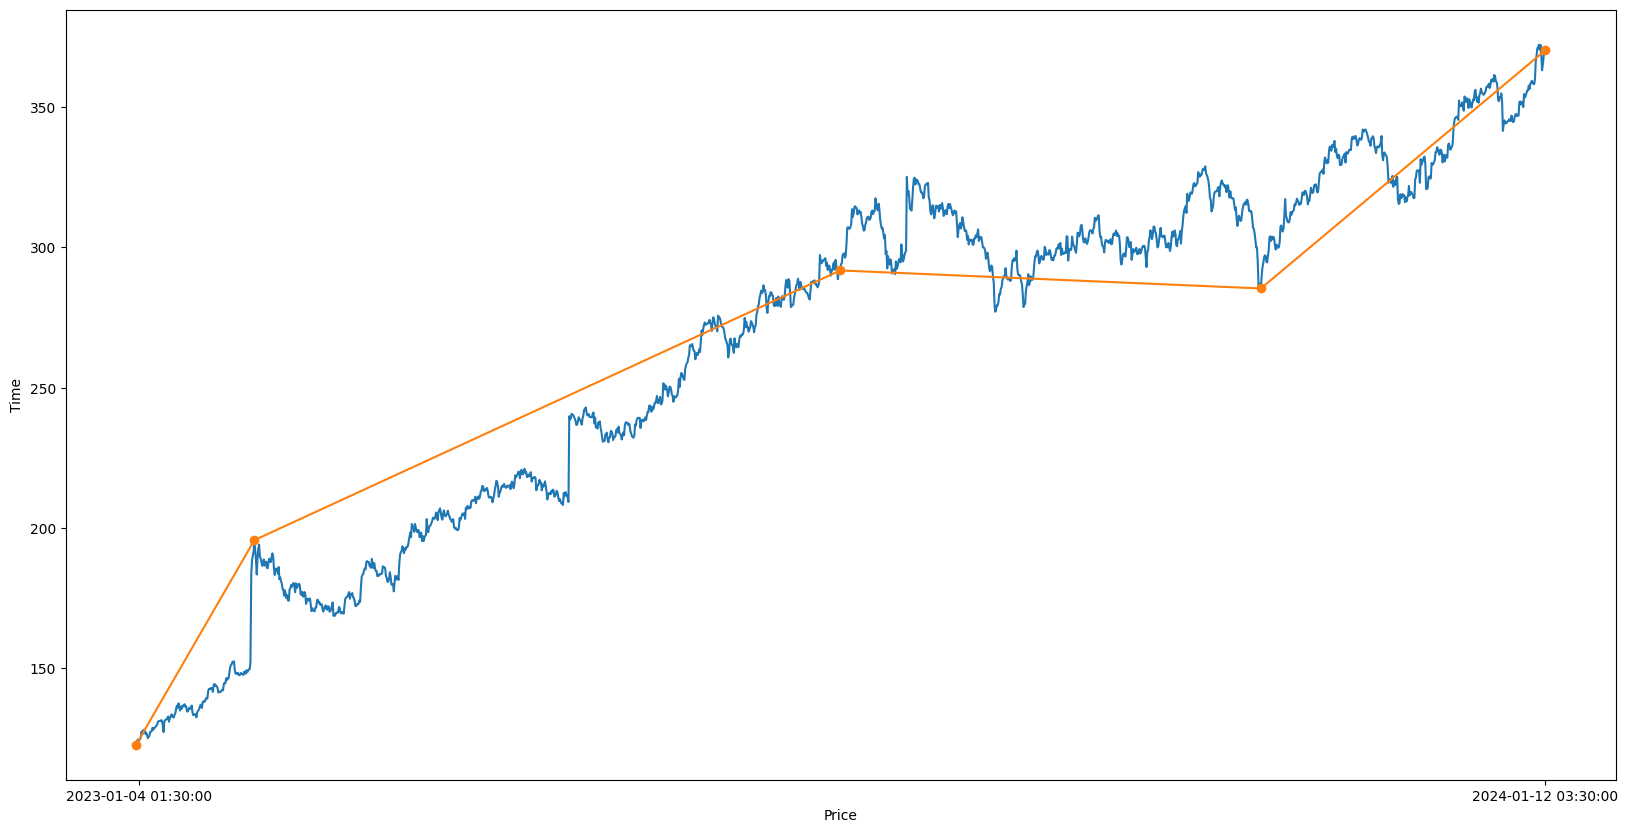

In [ ]:
pip = PIP(main_df['open'], main_df['datetime'], 5, 0, True)
pip.find_PIP()